In [1]:
%matplotlib inline

from __future__ import division
import os
import sys
from scipy import integrate, optimize

from scipy.interpolate import interp2d, interp1d

import numpy as np
from numpy import pi,sin,cos,tan,e,arctan,arcsin,arccos,sqrt
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as P
from time import clock


matplotlib.rcParams['figure.figsize'] = (9, 6)
P.rcParams['text.usetex'] = True  # not really needed
P.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
P.rcParams["font.size"] = 26
P.rcParams['lines.linewidth'] = 2.5
P.rc('xtick', labelsize=23) 
P.rc('ytick', labelsize=24)
# P.rc('xtick', labelsize=20) 
# P.rc('ytick', labelsize=20)
np.set_printoptions(threshold=np.nan)


# sys.path.append("/Users/amadeus/Documents/10.semester/ma")
# from magmod import P_cdm_BBKS, D_z, rCom, H_0, c, H_z, E_z, Omega_m, W_tophat, T_obs, nutoz21, h
# from magmod import P_cdm_BBKS, D_z, rCom, H_0, c, H_z, E_z, Omega_m, T_obs, nutoz21, h
from magmod import *
from magbias_experiments import SKA_zhangpen, CLAR_zhangpen, SKA1, SKA2, cb_hirax as hirax, hirax512, LSST, LSST_nosgfit, n



#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$ 
Rescaling the galaxy number density by a factor of 104185.986576 to match the gold sample with 6330073646.61 total galaxies 
#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$ 



In [2]:
########################################################################
########################################################################
############SETTING UP SKA B1:####################################




#fg:
b1_numax= SKA1["numax"]           # Max. freq. of survey
b1_numin= SKA1["numin"]
b1_nutot= b1_numax-b1_numin              # Total bandwidth of *entire* survey [MHz]

zmin_b1, zmax_b1, zf_b1, dzf_b1 = get_fg_bin_for_frequency_range(b1_nutot, b1_numax)




############SETTING UP SKA B2:####################################
########################################################################
#######################################################################




#fg:
b2_numin = SKA2["numin"]
b2_numax= SKA2["numax"]        # Max. freq. of survey
b2_nutot= b2_numax-b2_numin          # Total bandwidth of *entire* survey [MHz]


zmin_b2, zmax_b2, zf_b2, dzf_b2 = get_fg_bin_for_frequency_range(b2_nutot, b2_numax)

buffer_z = 0.1 #buffer between fg and bg to avoid correlation, 



########################################################################
########################################################################
############SETTING UP SKA B1:####################################




#fg:
b1_nutot= 435.              # Total bandwidth of *entire* survey [MHz]
b1_numax= 1015.           # Max. freq. of survey

zmin_b1, zmax_b1, zf_b1, dzf_b1 = get_fg_bin_for_frequency_range(b1_nutot, b1_numax)




# ############SETTING UP SKA B2:####################################
# ########################################################################
# #######################################################################




# #fg:
# b2_nutot= 470.          # Total bandwidth of *entire* survey [MHz]
# b2_numax= 1420.        # Max. freq. of survey


# zmin_b2, zmax_b2, zf_b2, dzf_b2 = get_fg_bin_for_frequency_range(b2_nutot, b2_numax)

# #bg:

# mso_b2 = [21.00097656]
# zbmin_b2, zbmax_b2, zb_b2, dzb_b2 = get_bg_bin_for_fgzmax(zmax_b2, bufferz = buffer_z)



In [3]:
# Band2:
zHIRAX_max = 2. # last bin goes slightly beyond that. more does not make sense otherwise we have no galaxies left to cross correlate with
buffer_z = 0.1 #buffer between fg and bg to avoid correlation, 


zSKA2_min = np.amax([0.0005, nutoz21(SKA2["numax"])]) # minimum of HIRAX

zSKA2_max = np.amin([zHIRAX_max, nutoz21(SKA2["numin"])]) # last bin goes slightly beyond that. more does not make sense otherwise we have no galaxies left to cross correlate with

print "\nBand 2:"
print zSKA2_max, zSKA2_min

# zSKA2_allbin = np.arange( zSKA2_min, zSKA2_max + dz, step = dz)
dzSKA2 = zSKA2_max - zSKA2_min
zSKA2_allbin = np.array( [zSKA2_min, zSKA2_max])

print dzSKA2, "dz"
print zSKA2_allbin, "all"
zSKA2_lowbin = zSKA2_allbin[:-1]
zSKA2_highbin = zSKA2_allbin[1:]
zSKA2_meanbin = (zSKA2_lowbin + zSKA2_highbin)/2

nbinS2 = len(zSKA2_lowbin)
print zSKA2_lowbin, "low"
print zSKA2_highbin, "high"
print zSKA2_meanbin, "mean"
print nbinS2, "BINS"


zmin_b2, zmax_b2, zf_b2, dzf_b2 = [zSKA2_lowbin[0], zSKA2_highbin[0], zSKA2_meanbin[0], dzSKA2]
zbmin_b2, zbmax_b2, zb_b2, dzb_b2 = get_bg_bin_for_fgzmax(zmax_b2, bufferz = buffer_z)


Band 2:
0.470399585921325 0.0005
0.469899585921325 dz
[0.0005     0.47039959] all
[0.0005] low
[0.47039959] high
[0.23544979] mean
1 BINS


# and now a quick illustration of the behaviour of the lensing kernel:

fg bg distance is 0.1z
Using non default rmax = 23 for experiment
Using non default rmax = 23 for experiment


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply


Using non default rmax = 23 for experiment
fg bg distance is 0.1z
Using non default rmax = 25 for experiment
Using non default rmax = 25 for experiment
Using non default rmax = 25 for experiment
fg bg distance is 0.1z
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment
Using non default rmax = 27 for experiment


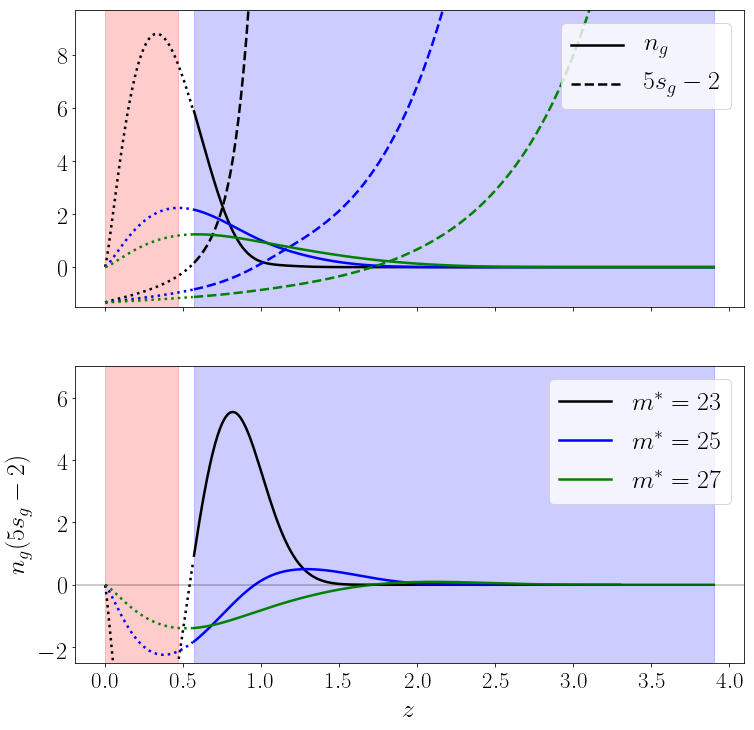

In [6]:

#################
#plot the foreground range and background dndz as well as 5sg-2:

ztab = np.linspace(0.001, 3.9,1000)
# fig = P.figure(); ax= fig.add_subplot(111);
fig, allax = P.subplots(2,1, sharex = True, figsize = (12,12))
ax = allax[0]
ax2 = allax[1]

ymax_now = [] #to set the y limits later

colors = ['black', 'blue', 'green']

rtab = [23,25,27]
for irr in np.arange(len(rtab)):
    rr = rtab[irr]
    
    #set colors and labels:
    c = colors[irr]
    
    if irr == 0:
        axnzlab = r"$n_g$"
        axsglab = r"$5s_g-2$"
    else:
        axnzlab = ""
        axsglab = ""
    
    #bg range for mstar:
#     zbbbmax = zmax_of_MAXMAG(rr)
    zbbbmin_b2, zbbbmax_b2, zbbb_b2, dzbbb_b2 = get_bg_bin_for_fgzmax(zmax_b2, bufferz = buffer_z)
    print "fg bg distance is {}z".format(zbbbmin_b2-zmax_b2)

    if irr == 2:
#     if irr == 2 or irr == 1 or irr == 0:
        for axx in allax:
            axx.fill_between( np.array( [zbbbmin_b2, zbbbmax_b2]), -10, 100, color = 'blue', alpha = 0.2)
#             axx.fill_between( np.array( [zbbbmin_b2, 4.]), -10, 100, color = 'blue', alpha = 0.1)


    Wtab = W_dndz(ztab, zbbbmin_b2, zbbbmax_b2, rr, FIT = False)
    Wtab_outside = W_dndz(ztab, zmin_b2, zbbbmin_b2, rr, FIT = False)
    transition_i = np.abs(ztab - zbmin_b2).argmin() -1 #minus 1 is test!
    norm = Wtab_outside[transition_i]/Wtab[transition_i + 1]

    Wtab_outside /= norm

    ax.plot(ztab[transition_i+1:], Wtab[transition_i+1:], c = c, label = axnzlab)
    ax.plot(ztab[:transition_i], Wtab_outside[:transition_i],c = c, ls = ":")

    Woutmax = np.amax(Wtab_outside)
    Wmax = np.amax(Wtab)
    ymax_now.append( np.amax((Woutmax, Wmax)) )
    
    #background redshift only:
    zbtab = np.linspace(zbbbmin_b2, zbbbmax_b2, 200)
    sgtab = sg5minus2(zbtab, rr )
    
    sgtab_outside = sg5minus2(ztab, rr)[:transition_i]
    
    ax.plot(zbtab, sgtab, c = c, ls = "--", label = axsglab)
    ax.plot(ztab[:transition_i], sgtab_outside, ls = ":", c =c)
    
    Wtab_inside = W_dndz(zbtab, zbbbmin_b2, zbbbmax_b2, rr, FIT = False)
    ax2.plot(zbtab, Wtab_inside * sgtab, c=c, label = r"$m^* = {}$".format(rr))
    
    #outside bg redshift only:
    sgtab_outside = sg5minus2(ztab, rr )
    ax2.plot(ztab[:transition_i], Wtab_outside[:transition_i]*sgtab_outside[:transition_i],c = c, ls = ":")
    
#     Nnorm = dndz_norm(zbbbmin_b2, zbbbmax_b2, rr, FIT = False)
#     sgngtab = sgng_interp(ztab, rr)/Nnorm
#     ax2.plot(ztab, sgngtab, color = 'red', ls = ":")



#fg redshift range:
ax.fill_between( np.array( [zmin_b2, zmax_b2]), -10, 100, color = 'red', alpha = 0.2)
ax2.fill_between( np.array( [zmin_b2, zmax_b2]), -10, 100, color = 'red', alpha = 0.2)

#horizontal line at 0 for ax2:
ax2.axhline(0, c = 'black', lw = 0.4)

ymax = np.amax(ymax_now)
ax.set_ylim((-1.5,ymax*1.1))
ax2.set_ylim((-2.5,7))

ax2.set_xlabel(r"$z$")
ax2.set_ylabel(r"$n_g (5s_g-2)$")

ax.legend(loc = "upper right")
ax2.legend(loc = "upper right")

plotdir = "/Users/amadeus/Documents/PhD/work/MagBias/plots/"
# plotdir = "/Users/amadeus/Documents/PhD/Thesis/tex/images/"
# print "we are saving plot to thesis!!!!"

# P.savefig( plotdir + "W_and_sg_SKAB2.pdf")